### **Task 4.9**
#### **Part 2:** Visualization
**All visualizations and further analysis done with cleaned data.**
* Outliers (99999 :9.2 & 14900: 8) have been replaced.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating shortcut for data file

path = r'/Users/anjanpakhrin/Documents/Instacart Basket Analysis/'

In [3]:
# Import merged instacart data set as dataframe "customers_merged"

customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))

In [4]:
# Checking output
customers_merged.head()

,user_id,gender,state,age,date_joined,num_dependents,family_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_prices,spending_flag,median_frequency,frequency_flag
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
customers_merged['prices'].describe()

count    3.240486e+07
mean     7.791052e+00
std      4.099997e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

#### **Question 3:** Histogram for **order_hour_of_day**

<function matplotlib.pyplot.show(close=None, block=None)>

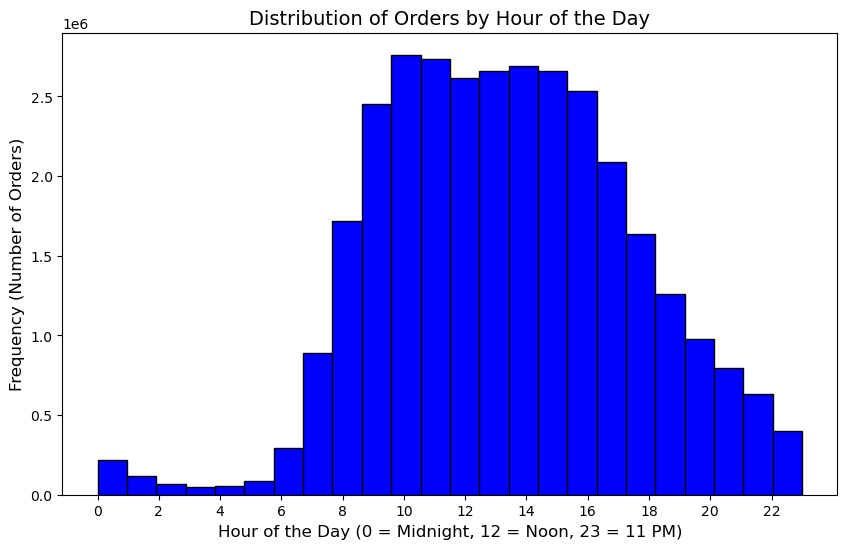

In [6]:
# Creating Histogram for "order_hour_of_day"

hist_hour = customers_merged['order_hour_of_day'].plot.hist(bins = 24, 
                                                           edgecolor = 'black',
                                                           color = 'blue',
                                                           figsize = (10, 6)
)
# Adding labels
plt.title('Distribution of Orders by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (0 = Midnight, 12 = Noon, 23 = 11 PM)', fontsize=12)
plt.ylabel('Frequency (Number of Orders)', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.show

In [7]:
# Exporting Histogram

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour.png'))

### Analysis of Order Hour Distribution
* This histogram demontrates the frequency of hourly orders placed throughout the day.
**Key Findings**
  * Order frequency begins climbing steadily after 6:00 AM.
  * **Morning Peak:** Highest number of orders occurs between 10:00 and 11:00 AM.
  * **Afternoon Peak:** A second significant rise in orders happens afternoon between 01:00 and 03:00 PM.
  * **Lowest Activity:** As expected and normal orders are at their minimum during early morning hours starting from late night.

#### **Question 4:** Bar chart to demonstrate the distribution of orders among customers in term of loyalty

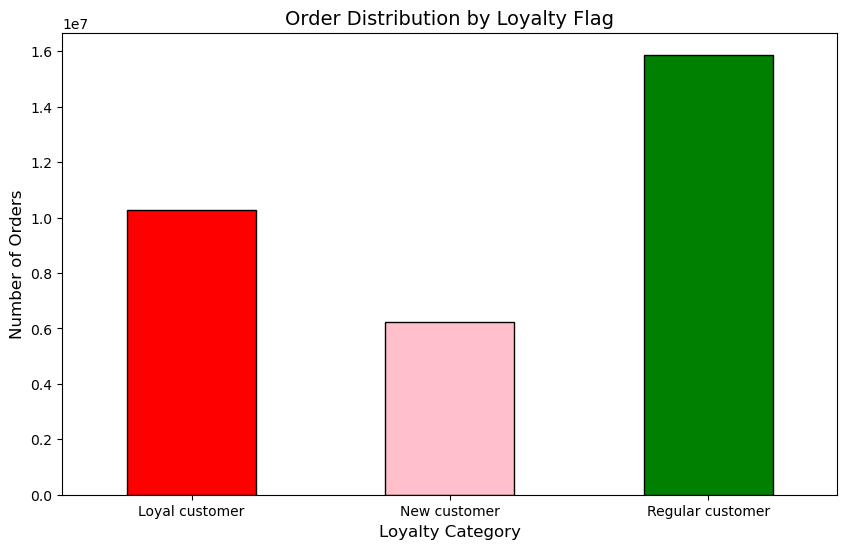

In [8]:
# Getting the value counts
loyalty_counts = customers_merged['loyalty_flag'].value_counts().sort_index()

# Create the bar chart
bar_loyalty = loyalty_counts.plot.bar(color = ['red', 'pink', 'green'], 
                                      edgecolor='black',
                                      figsize = (10, 6)
)

# Adding labels
plt.xlabel('Loyalty Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Order Distribution by Loyalty Flag', fontsize=14)

# Rotating x-axis labels
plt.xticks(rotation=0) # Keeps horizontal
plt.show()

In [9]:
# Exporting bar chart

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cahrt_loyalty.png'))

#### **Question 5:** Create Line chart to check for difference in expenditure by hour of the day

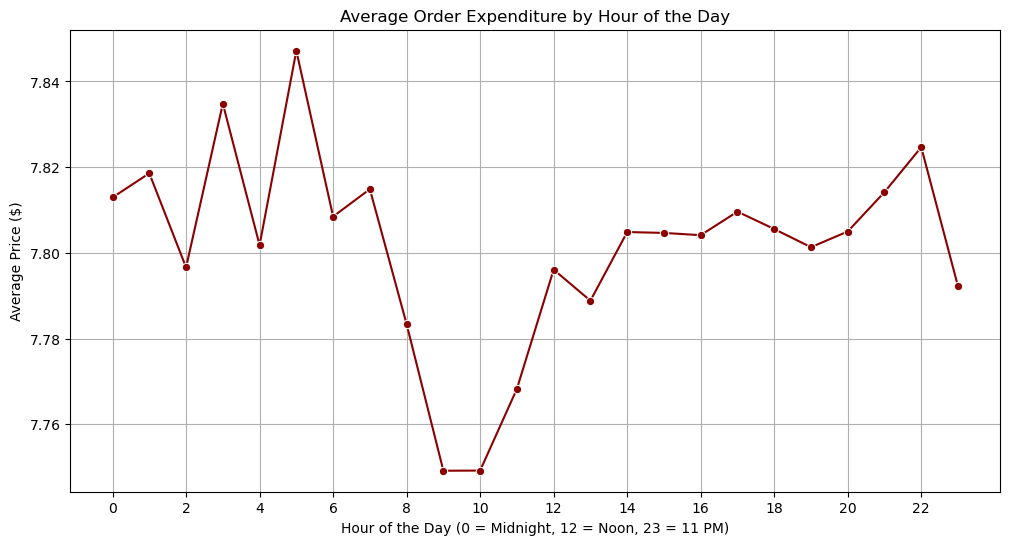

In [10]:
# Creating a sample
np.random.seed(4)
dev = np.random.rand(len(customers_merged)) <= 0.7

# Using the 30% sample for efficiency and respecting machine capacity
small = customers_merged[~dev]

# Group by order hour and get mean price
df_hourly_price = small.groupby('order_hour_of_day')['prices'].mean().reset_index()

# Creating the line chart
line_hourly_expenditure = plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hourly_price, x='order_hour_of_day', y='prices', marker='o', color='darkred')
plt.title('Average Order Expenditure by Hour of the Day')
plt.xlabel('Hour of the Day (0 = Midnight, 12 = Noon, 23 = 11 PM)')
plt.ylabel('Average Price ($)')
plt.xticks(range(0, 24, 2))
plt.grid(True)

plt.show()

In [11]:
# Exporting line chart

line_hourly_expenditure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hourly_expenditure.png'))

#### **Analysis Summary:**
* **No clear pattern:** Line is relatively flat with minor fluctuations
* **No significance difference** in expenditure based on hour of day
* Time of the day **does not appear** to be major factor influencing spending amounts

#### **Question 6:** Conduct exploratory analysis of customer demographics for targeted marketing
* **Line chart** to check the connection between **age** and **family situation**

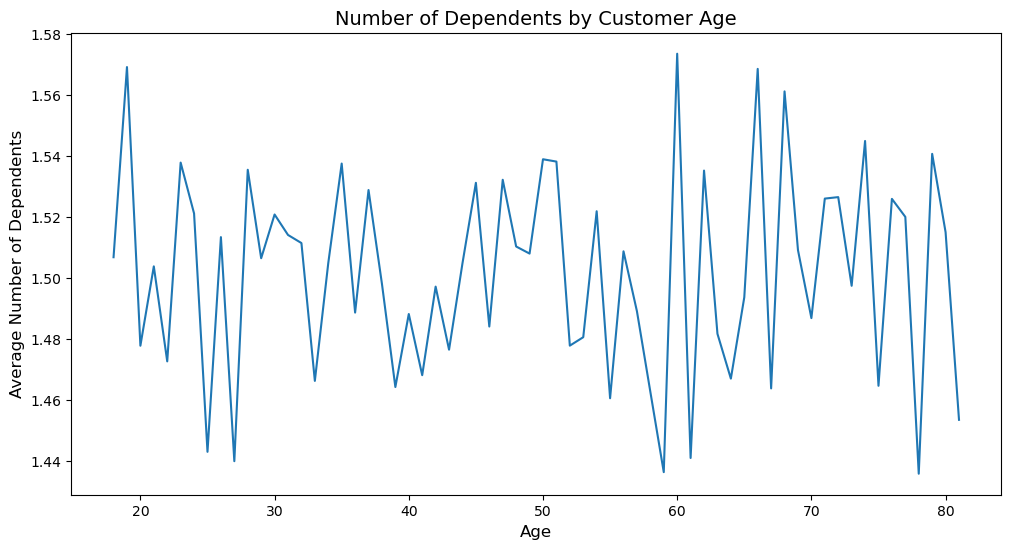

In [12]:
# First step: Calculating average number of dependents for each age group
age_dependents = customers_merged.groupby('age')['num_dependents'].mean().reset_index()

# Second step: Creating line chart
line_age_dependent = plt.figure(figsize=(12, 6))
sns.lineplot(data = age_dependents, x = 'age', y = 'num_dependents')

# Adding labels
plt.title('Number of Dependents by Customer Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Number of Dependents', fontsize=12)

plt.show()

In [13]:
# Exporting line chart

line_age_dependent.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_deoendent.png'))

#### **Summary**
* The chart demonstrates the average number of dependents across differenct customer ages.
* The values for number of dependents remain **fairly stable** acround 1.5 dependents.
* No strong fluctuation is visible, which indicates consistent family size across age groups.
* For marketing, **age alone is not a strong predictor** of family situation.

#### **Question 7:** Exploring connection between **age and spending power (income)**

<function matplotlib.pyplot.show(close=None, block=None)>

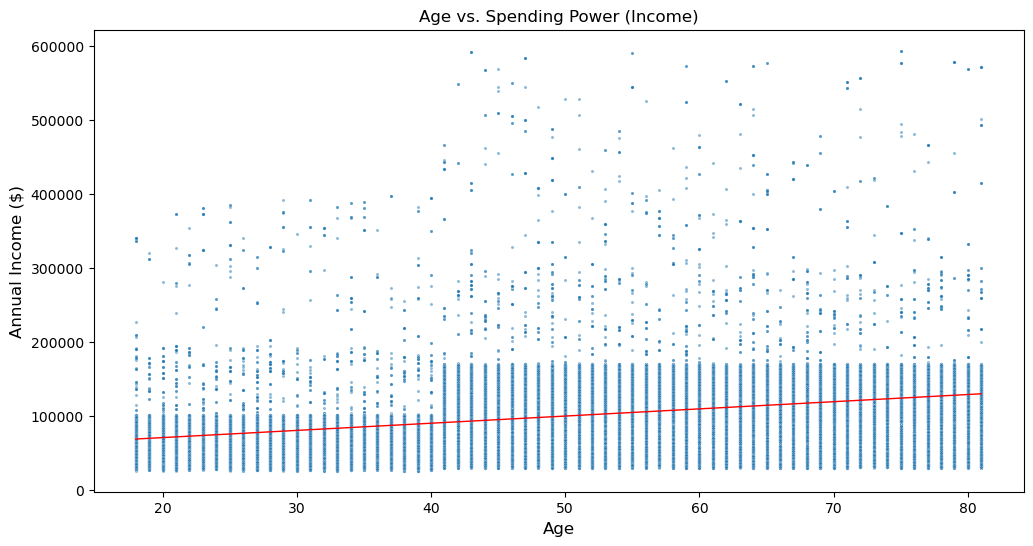

In [14]:
# Creating scatterplot with regression line for age vs. income

# Sample of random 200k rows
sample_customers_merged = customers_merged.sample(n = 200_000, random_state = 42)

# Create scatterplot
scatterplot_age_vs_income = plt.figure(figsize = (12, 6))
sns.scatterplot(data = sample_customers_merged, x = 'age', y = 'income', alpha = 0.5, s = 5)

sns.regplot(data= sample_customers_merged, x = 'age', y = 'income',
           scatter = False,
           line_kws = {'color': 'red', 'linewidth': 1})

# Addinf labels
plt.title('Age vs. Spending Power (Income)')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Annual Income ($)', fontsize = 12)

plt.show

In [15]:
# Exporting line chart

scatterplot_age_vs_income.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_vs_income.png'))

#### **Key Observations**
* **Wide spread:** Income levels are spread acros all ages, from young adults to older customers.
* **No strong correlation:** No clear upward or downward trend linking age with income is visible.
* **Possible outliers:** A few customer, especially in middle and older age groups, show much higher income values.
##### **Overall, this plot suggest that age is not a strong predictor of income in this dataset. For marketing purpose, segmenting customers based on income directly, rather than inferring it from age, would be more effective.**